# EDA

### Import des librairies et de la donnée

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

df = pd.read_csv("../data/01_raw/data.csv")
pd.set_option('display.float_format','{:.2f}'.format)

## Affichez les 10 première lignes du jeux de données

In [43]:
df.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL        65.00     8450   Pave   NaN      Reg   
1   2          20       RL        80.00     9600   Pave   NaN      Reg   
2   3          60       RL        68.00    11250   Pave   NaN      IR1   
3   4          70       RL        60.00     9550   Pave   NaN      IR1   
4   5          60       RL        84.00    14260   Pave   NaN      IR1   
5   6          50       RL        85.00    14115   Pave   NaN      IR1   
6   7          20       RL        75.00    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM        51.00     6120   Pave   NaN      Reg   
9  10         190       RL        50.00     7420   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7         Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  
5     10   2009        WD         Normal     143000  
6      8   2007        WD         Normal     307000  
7     11   2009        WD         Normal     200000  
8      4   2008        WD        Abnorml     129900  
9      1   2008        WD         Normal     118000  

[10 rows x 81 columns]

## Utilisation du .info()

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Suppression des colonnes avec plus de 30% de valeurs manquantes

In [45]:
t= df.shape[0] * 30 / 100
df.dropna(thresh=t, axis=1, inplace=True)
df.drop('Id',axis=1, inplace=True)

## Informations de SalePrice avec describe()

In [46]:
df["SalePrice"].describe()

count     1460.00
mean    180921.20
std      79442.50
min      34900.00
25%     129975.00
50%     163000.00
75%     214000.00
max     755000.00
Name: SalePrice, dtype: float64

# Focus variables quantitatives
## Distribution de SalePrice

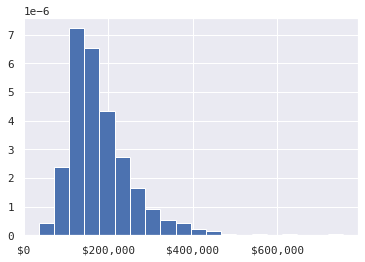

In [49]:
# sous la forme d'histogramme
ax=df["SalePrice"].hist(density=True,bins=20)

# on change le format de l'axe x
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

# On modifie le nombre de valeur affichées sur les axes x et y
ax.locator_params(axis="x", nbins=5)
plt.show()

- Ce graphique montre que la grande majorité ce trouve au dessous du prix moyen
- Coéfficient d'asymétrie positif 
- Coéfficient d'aplattisement assez élevé

## Sélectionnez les variables int64 + float64 afin d'afficher les histogrammes pour l'ensemble de ces variables. Qu'elles sont les variables ayant une distribution proche de SalePrice? Que peut on conclure de ces variables?

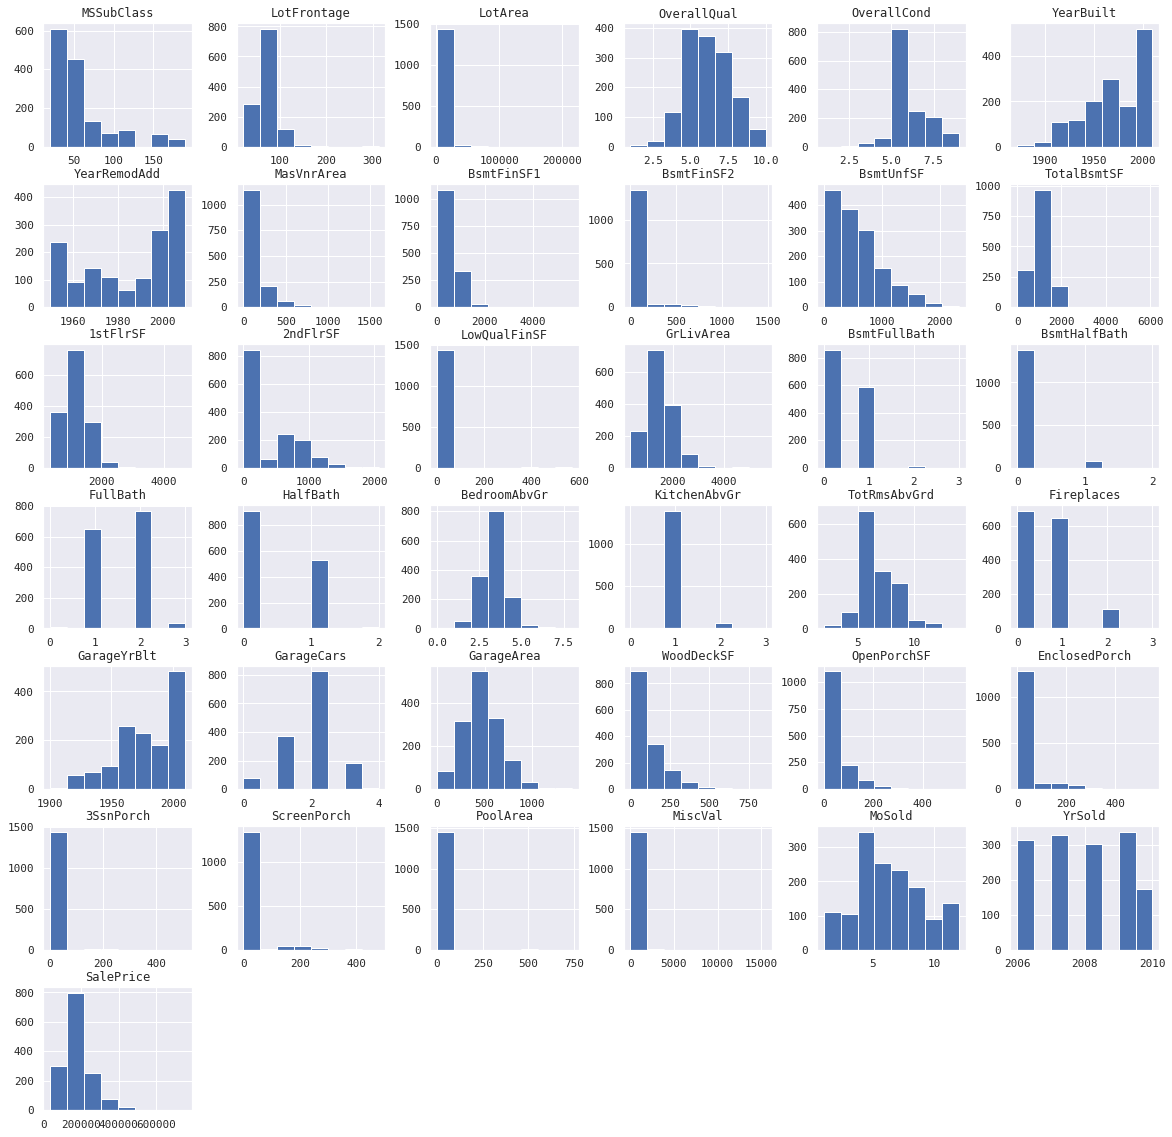

In [58]:
df_num = df.select_dtypes(include=['float64', 'int64'])
df_num.hist(figsize=(20,20), bins=8);


1stFlSF, LotFrontage, TotalBsmtSF ont une courbe proche de SalePrice, elles semblent corrélés

## Affichez les 10 variables les plus corrélées avec SalePrice (Avec Pandas il est possible de calculer les corrélation avec .corr()).

In [50]:
corr = df_num.corrwith(df_num["SalePrice"])
corr.sort_values(ascending=False).abs().head(10)

SalePrice      1.00
OverallQual    0.79
GrLivArea      0.71
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
dtype: float64

In [51]:
df_corr = df[
    ['OverallQual',
     'YearBuilt',
     'TotalBsmtSF', 
     '1stFlrSF', 
     'GrLivArea', 
     'FullBath', 
     'TotRmsAbvGrd',
     'GarageCars', 
     'GarageArea', 
     'SalePrice']
     ]

## Réalisez un pairplot permettant d'afficher la relation entre SalePrice et les variables sélectionnés. Qu'elle est la forme des plot croisant les 3 variables les plus corrélées avec SalePrice?

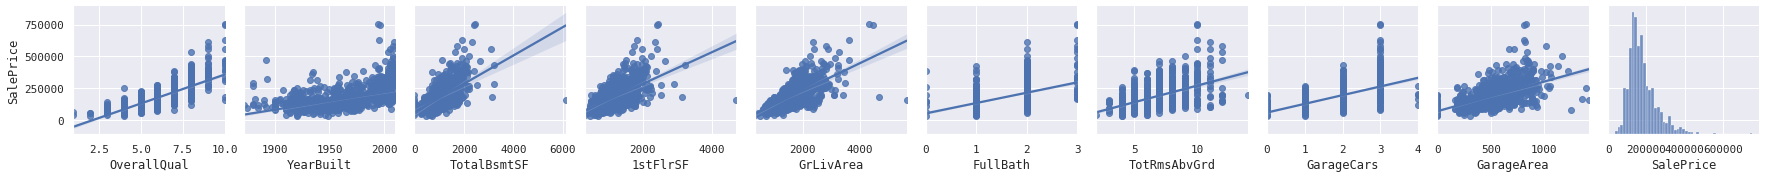

In [61]:
sns.pairplot(data= df_corr,y_vars= 'SalePrice',x_vars=df_corr.columns[:], kind="reg");

In [ ]:
Elles ont une forme de rampe montante

## Réalisez une heatmap afin de visualiser d'une autre manière les corrélations 2 à 2. Y'a t'il des variables fortement corrélées entre elles? Identifiez les 3 pairs les plus corrélées

<AxesSubplot:>

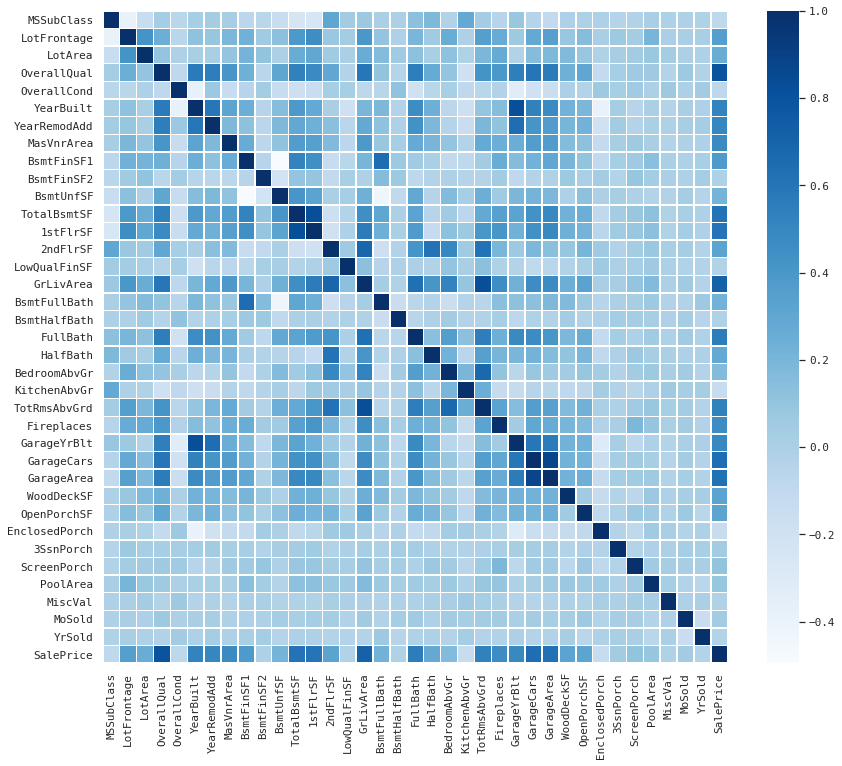

In [53]:
sns.set(font="monospace")
plt.figure(figsize=(14, 12))
sns.heatmap(df_num.corr(), linewidths=.5, cmap="Blues")

Fortes corrélations
- OverallQual et SalePrice
- GarageYrBlt et YearBuilt
- TotalBsmntSF et 1stFlrSF

## réalisez un regplot permettant de croiser ces variables avec SalePrice.

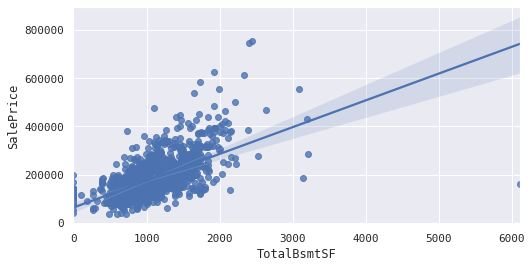

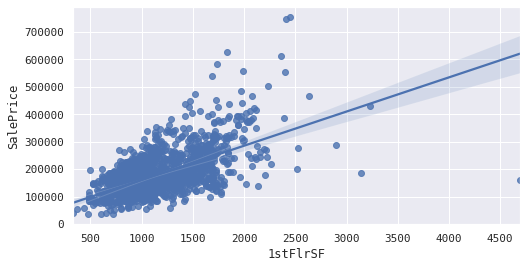

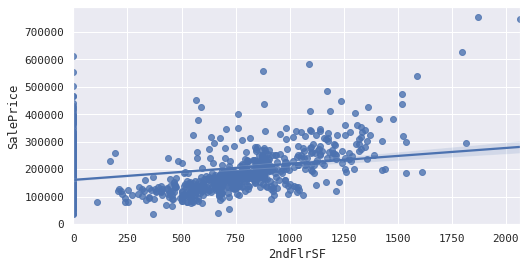

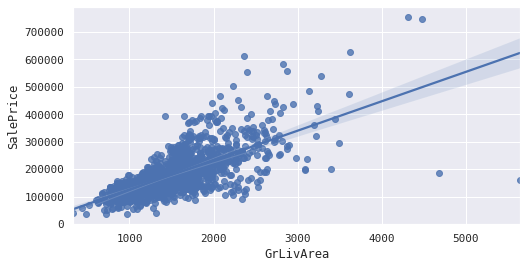

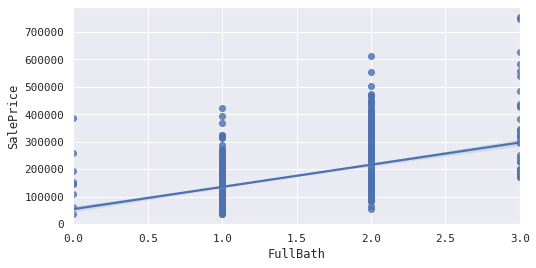

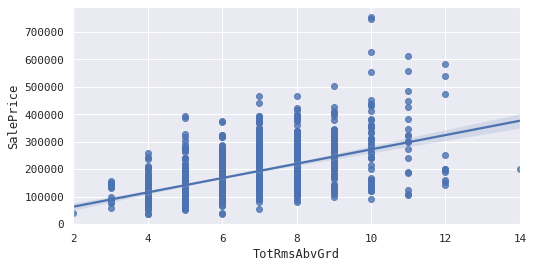

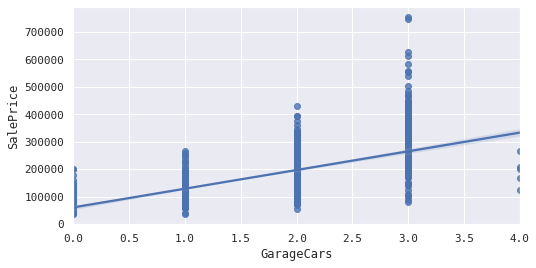

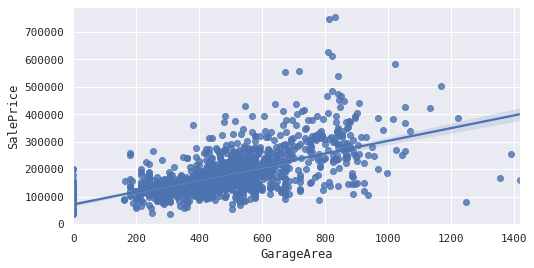

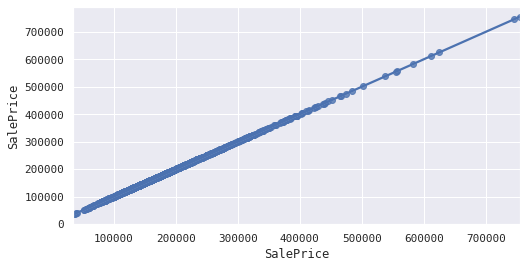

In [54]:
list_cols=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']


for col in df[list_cols]:
    plt.figure(col, figsize=(8,4))
    sns.regplot(x=col, y="SalePrice", data=df)

## Afficher le jointplot avec le coefficient de pearson pour le croisement SalePrice & GrLivArea.

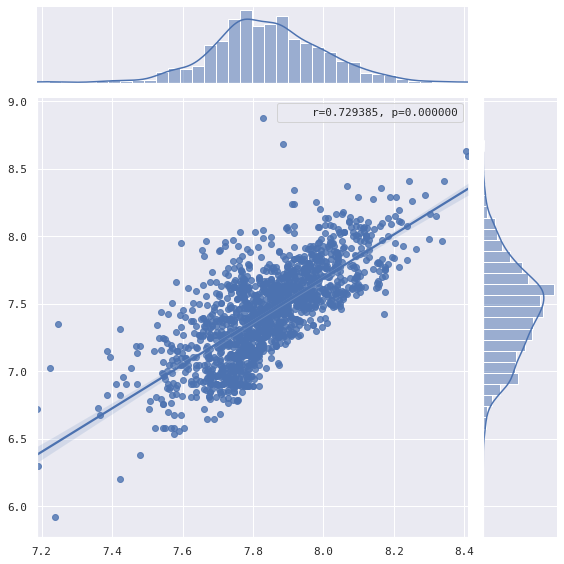

In [111]:

xt, _ = stats.boxcox(df["SalePrice"])
yt, _ = stats.boxcox(df["GrLivArea"])
j = sns.jointplot(x=xt, y=yt, kind="reg", height=8)
r, p = stats.pearsonr(xt, yt)
phantom, = j.ax_joint.plot([], [], linestyle="", alpha=0)
j.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

# Focus variables qualitatives
## Réalisez un code permettant d'identifier automatiquement les variables de type Object


In [31]:
df_qual = df.select_dtypes(include='O')

## Sur la liste de variables obtenus, utilisez un countplot sur toutes les variables

<ipython-input-32-440dfb4977c8>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(col, figsize=(8,4))


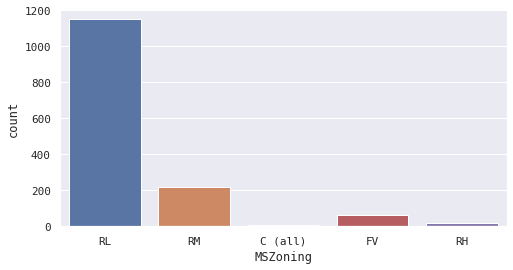

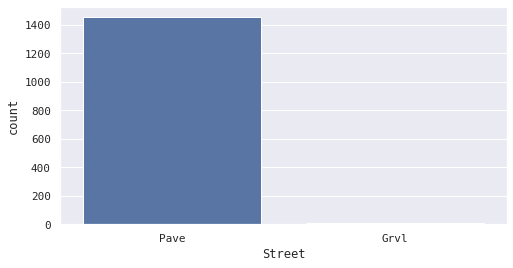

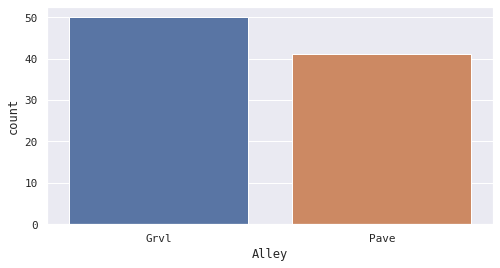

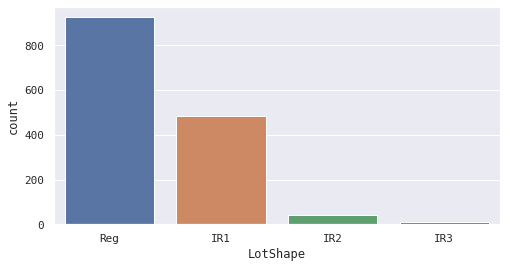

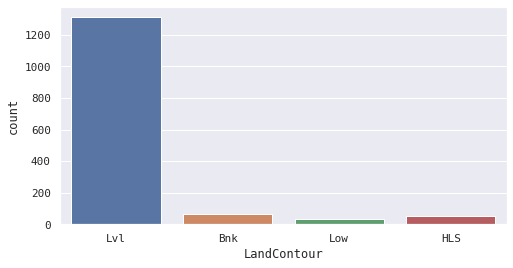

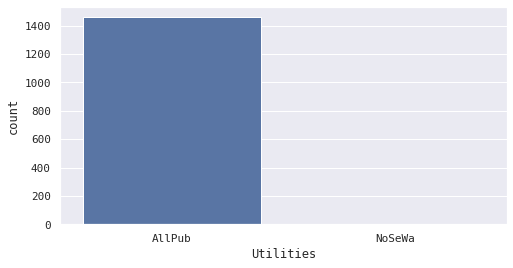

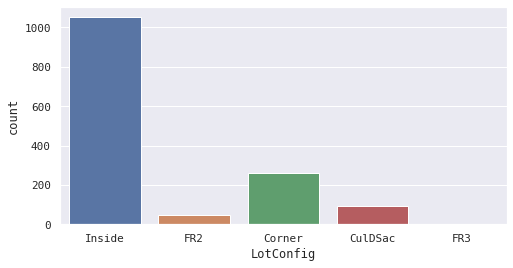

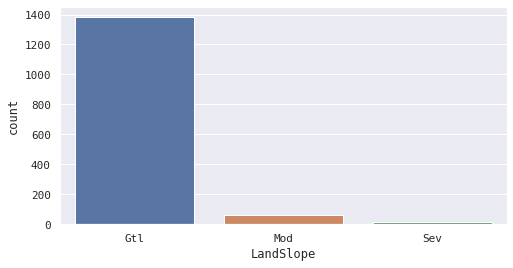

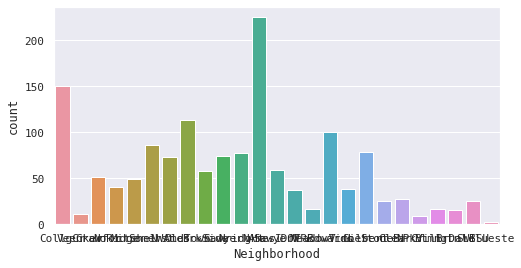

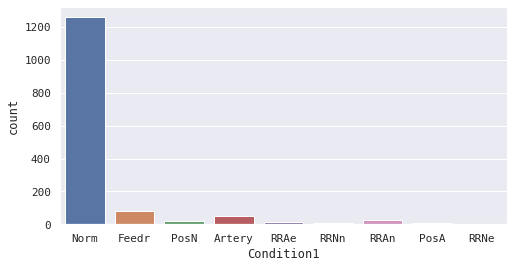

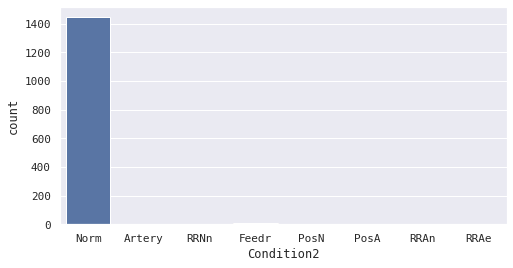

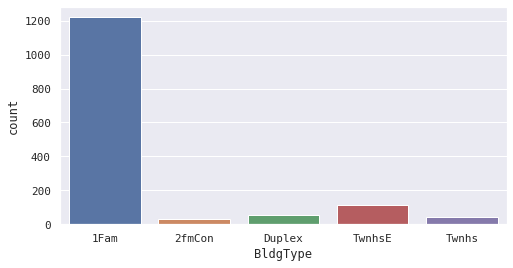

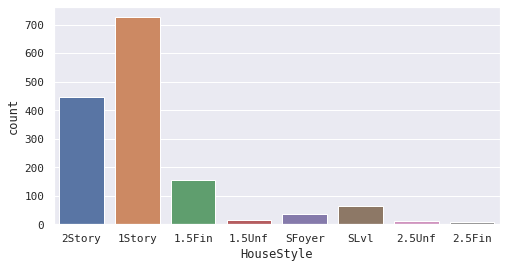

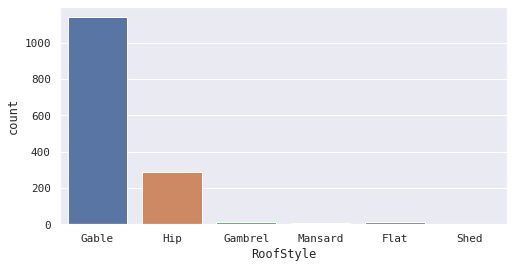

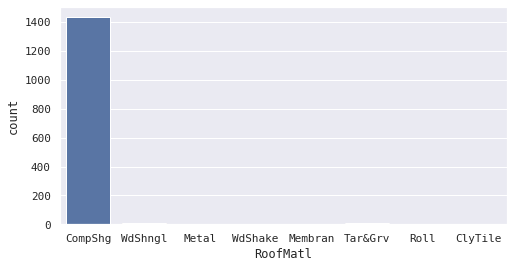

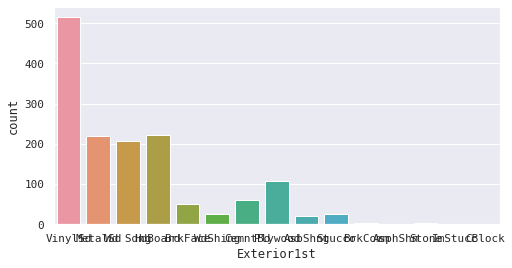

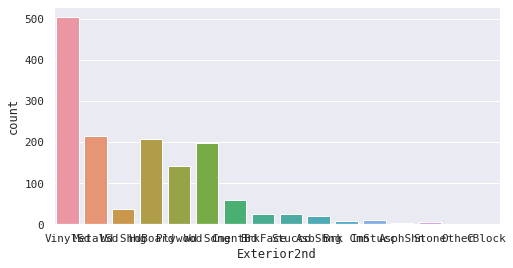

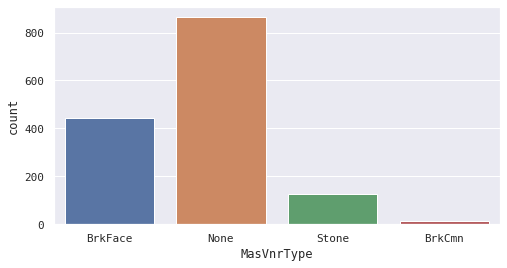

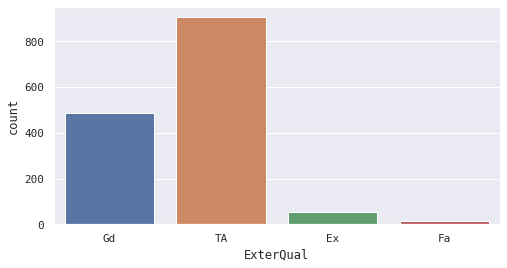

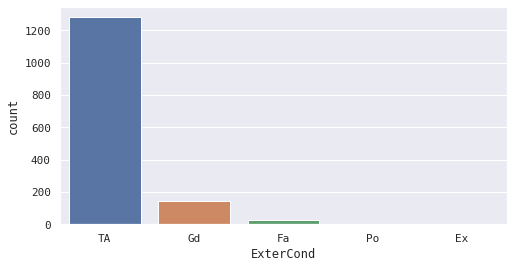

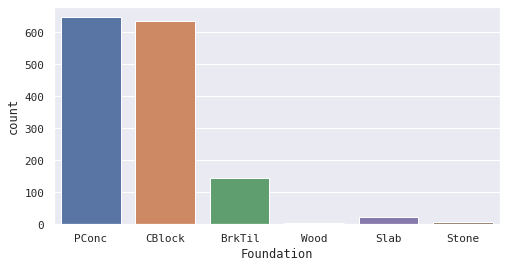

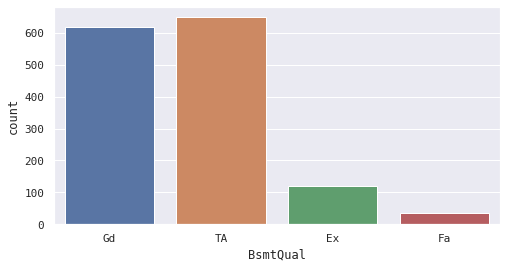

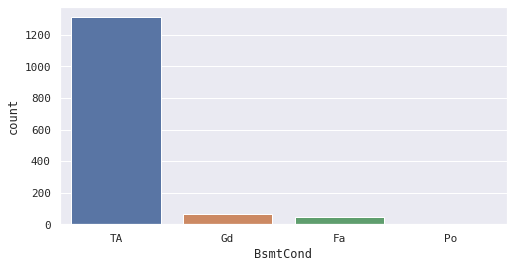

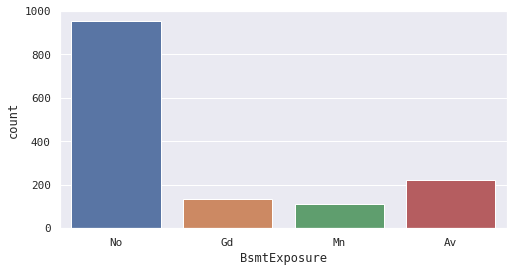

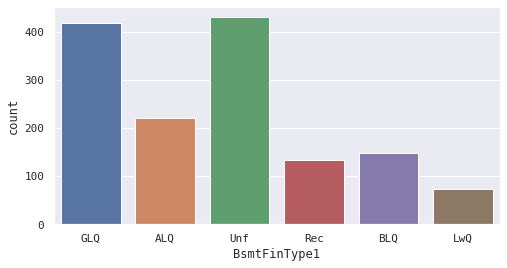

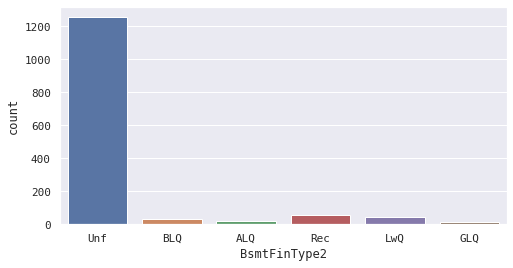

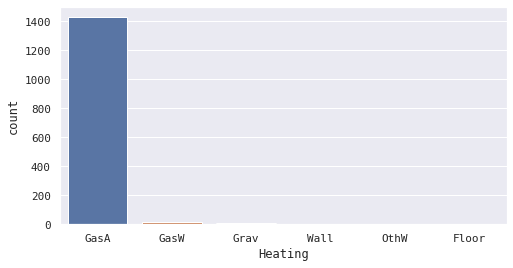

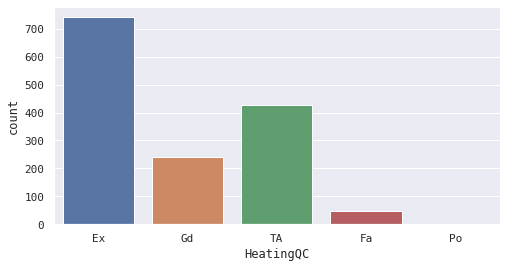

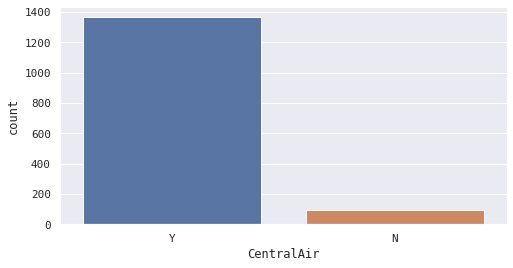

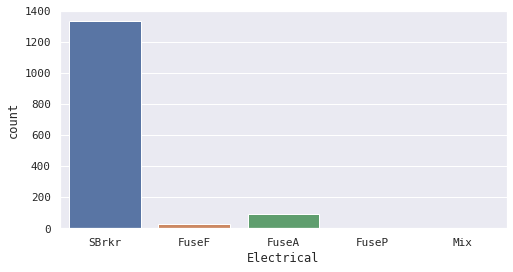

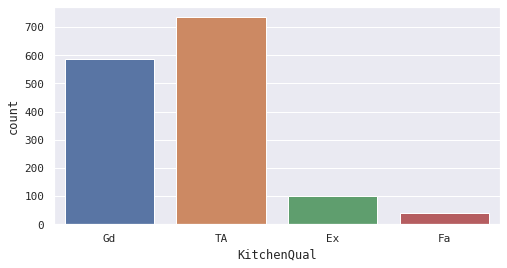

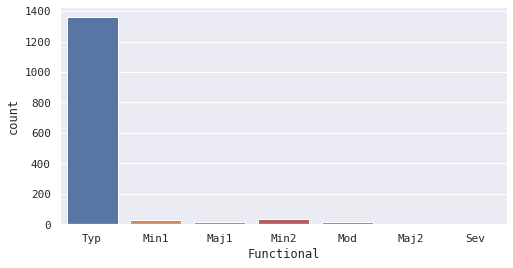

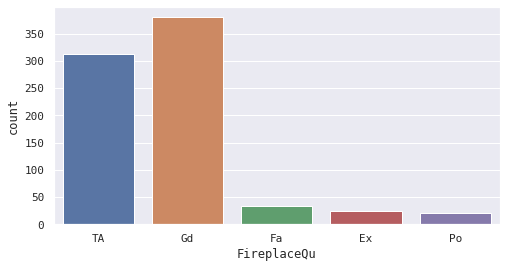

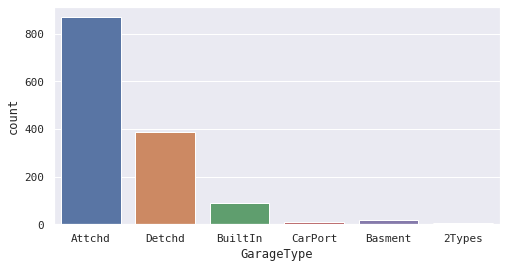

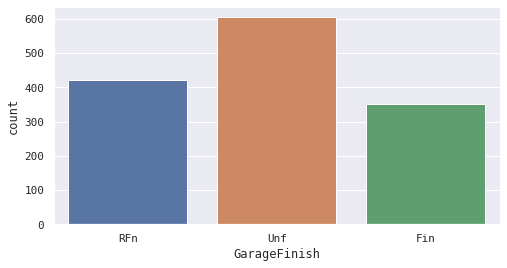

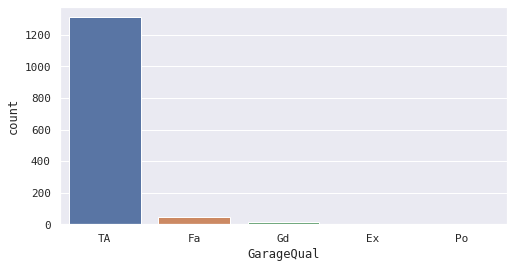

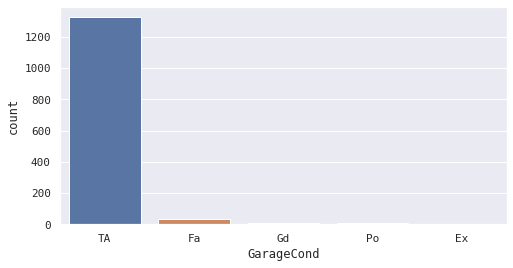

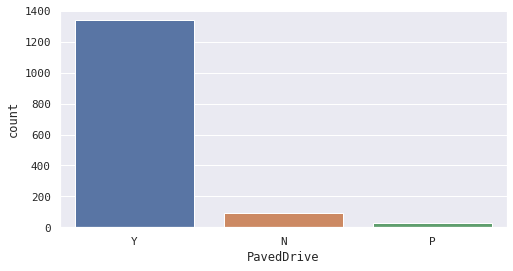

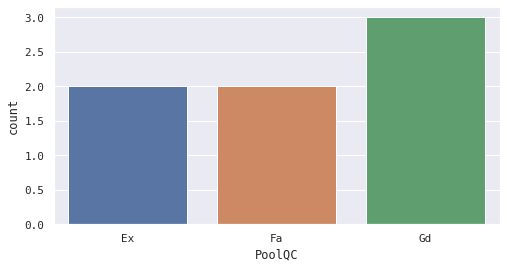

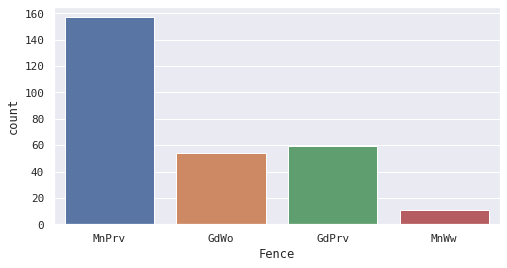

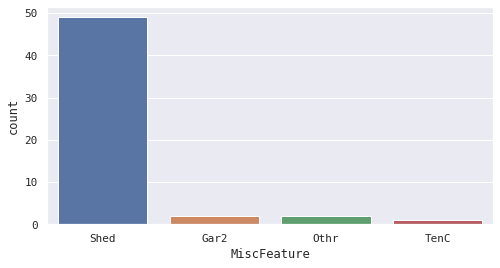

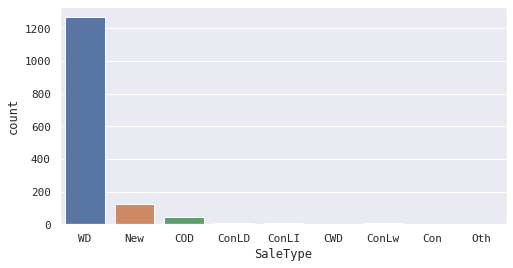

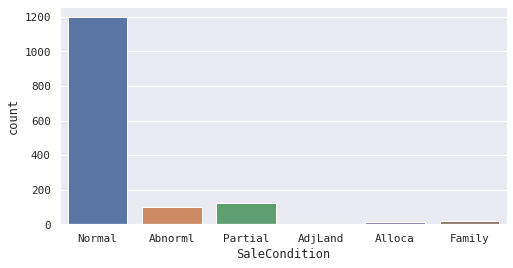

In [32]:

for col in df_qual.columns:
    plt.figure(col, figsize=(8,4))
    sns.countplot(x=df_qual[col])

## Listez au moins 5 variables que ne vous semble pas pertinente pour expliquer le prix d'une maison.

In [112]:
s = pd.Series(dtype="float64")
for col in df_qual.columns:
    # Ajout dans la Series du pourcentage d'occurence par rapport à la taille de la colonne pour chaque colonnes 
    s.loc[col] = df_qual[col].value_counts()[0]/len(df_qual[col])*100
# Récupération des 5 colonnes avec le pourcentage le plus haut
print(s.sort_values(ascending=False)[:5])


Utilities    99.93
Street       99.59
Condition2   98.97
RoofMatl     98.22
Heating      97.81
dtype: float64


## Ci-dessus, les colonnes les moins pertinentes pour expliquer le prix d'une maison